In [1]:
import sys
import re
import os
import time
import datetime
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
%matplotlib inline

In [2]:
df = pd.read_csv(os.getcwd()+"/data/THOR_DATA_WWII_DATA_Product_20160822.csv",sep=',',error_bad_lines=False)

/Users/readywater/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,28,32,33,34,36,38,40,42,43,48,53,54,56,58,61,67,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns.values

array(['WWII_ID', 'ID', 'MASTER_INDEX_NUMBER', 'THEATER', 'MSNDATE', 'DAY',
       'MONTH', 'YEAR', 'NAF', 'COUNTRY_FLYING_MISSION',
       'TGT_COUNTRY_CODE', 'COUNTRY_NAME', 'LOCATION_NAME',
       'TARGET_TYPE_DESCRIPTION', 'TARGET_ID_CODE', 'TGT_INDUSTRY_CODE',
       'TARGET_INDUSTRY_DESCRIPTION', 'SOURCE_LAT', 'SOURCE_LON', 'LAT',
       'LON', 'UNIT_ID', 'MDS', 'AIRCRAFT_NAME', 'MSN_TYPE',
       'TARGET_PRIORITY', 'TARGET_PRIORITY_EXPLANATION', 'ATTACKING_AC',
       'ALTITUDE', 'ALTITUDE_FEET', 'NUMBER_OF_HE', 'TYPE_OF_HE', 'LBS_HE',
       'TONS_OF_HE', 'NUMBER_OF_IC', 'TYPE_OF_IC', 'LBS_IC', 'TONS_OF_IC',
       'NUMBER_OF_FRAG', 'TYPE_OF_FRAG', 'LBS_FRAG', 'TONS_OF_FRAG',
       'TOTAL_LBS', 'TOTAL_TONS', 'SOURCE_LAUNCH_BASE',
       'SOURCE_LAUNCH_BASE_COUNTRY', 'SOURCE_LAUNCH_BASE_LAT',
       'SOURCE_LAUNCH_BASE_LONG', 'SORTIE_DUPE', 'TOTAL_AC_LOST',
       'TOTAL_AC_DAMAGED', 'AIRBORNE_AC', 'NUMBER_OF_AC_DROPPING_BOMBS',
       'TIME_OVER_TARGET', 'SIGHTING_METHOD_CODE'

In [4]:
df[['LAT','LON']] = df[['LAT','LON']].apply(lambda x: pd.to_numeric(x, errors='ignore'))
# df[['LAT']] = df[['LAT']].apply(lambda x: x-900 if x>1000 else x)
germany = df[(df['COUNTRY_NAME']=='Germany')]

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [6]:
plt.figure(figsize=(10,10))
m = Basemap(projection='merc',
              llcrnrlon = 5.3,              # lower-left corner longitude
              llcrnrlat = 47.49,               # lower-left corner latitude
              urcrnrlon = 14.8,               # upper-right corner longitude
              urcrnrlat = 53.8,               # upper-right corner latitude
              resolution = 'l',
              area_thresh = 100000.0,
              )

In [7]:
x, y = m(germany['LON'].values, germany['LAT'].values)

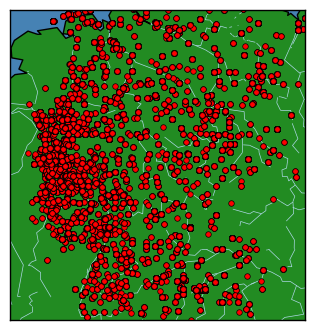

In [8]:
m.drawcoastlines()
m.drawrivers(color='lightblue')
m.fillcontinents()
m.drawmapboundary()
m.drawcounties()
m.fillcontinents(color = 'forestgreen')
m.drawmapboundary(fill_color='steelblue')
m.plot(x, y, 
            'o',                    # marker shape
            color='red',         # marker colour
            markersize=4)
plt.show()